In [6]:
%load_ext autoreload
%autoreload 2

In [1]:
# grep "INFO:maria-100_no_pretrain:loss_disc" maria-100_no_pretrain.out > loss.txt
# grep "INFO:maria-100_no_pretrain:Train Epoch:" maria-100_no_pretrain.out > epochs.txt

In [5]:
import pandas as pd
import numpy as np

In [7]:
run_name = 'maria-100_no_pretrain'
f = open(f"logs/{run_name}/loss.txt", "r")
lines = f.read().split('\n')[:-1]

ls = [l.replace(f'INFO:{run_name}:', '').split(',') for l in lines]

results = []
for x in ls:
    aux = dict([tuple(item.strip().split('=')) for item in x])
    results.append(aux)

loss_types = ['loss_disc', 'loss_gen', 'loss_fm', 'loss_mel', 'loss_kl']

d2 = {}
for loss_type in loss_types:
    d2.update({loss_type : [float(d[loss_type]) for d in results]})

df_loss = pd.DataFrame(d2)

f_ep = open(f"logs/{run_name}/epochs.txt", "r")
lines_ep = f_ep.read().split('\n')[:-1]

epochs = np.array([int(l.split(':')[-1].strip().split('[')[0]) for l in lines_ep])

df_epochs = pd.DataFrame(data = epochs, columns=['epochs'])

df_loss.index = df_epochs['epochs']

<Axes: xlabel='epochs'>

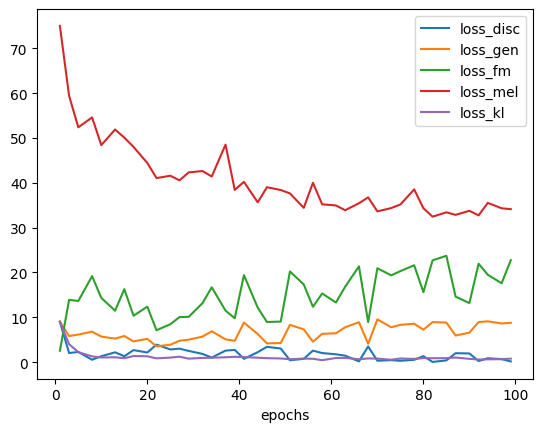

In [8]:
df_loss.plot()

<Axes: xlabel='epochs'>

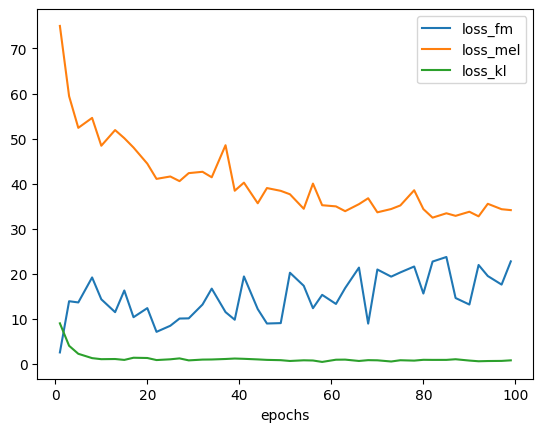

In [9]:
df_loss[['loss_fm', 'loss_mel', 'loss_kl']].plot()